In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle
from sklearn.metrics import r2_score

In [2]:
mu='60'

In [3]:
plt.rcParams.update({'font.size': 16})

In [4]:
if mu=='60':
    in_data="/mnt/shared/lvaughan/Pileup_ntuples/diHiggs_analysis_ntuples/dataset_diHiggs_mu60_NumEvents20k_Eval_MinJetpT25.root:fastjet"
    in_scores="/mnt/shared/lvaughan/Pileup_ntuples/diHiggs_analysis_ntuples/DiHiggs_Scores.root:jet_scores"
if mu=='200':
    in_data="/mnt/shared/lvaughan/Pileup_ntuples/mu200/DH4Bfilesmu200/dataset_diHiggs_mu200_NumEvents20k_eval_MinJetpT25.root:fastjet"
    in_scores="/mnt/shared/lvaughan/Pileup_ntuples/mu200/DH4Bfilesmu200/Jet_Scores_mu200.root:jet_scores"

In [5]:
with uproot.open( in_data ) as f:
    Efrac_true = f['jet_true_Efrac'].array()
    Mfrac_true = f['jet_true_Mfrac'].array()
    
if mu=='60':
    with uproot.open( in_scores ) as f:
        Efrac_pred = f['Efrac_Pred'].array()
        Mfrac_pred = f['Mfrac_Pred'].array()
if mu=='200':
    with uproot.open( in_scores ) as f:
        Efrac_pred = f['Efrac'].array()
        Mfrac_pred = f['Mfrac'].array()

In [6]:
mask = Efrac_pred!=-1
true_Efrac = ak.ravel(Efrac_true[mask])
pred_Efrac = ak.ravel(Efrac_pred[mask])

mask = Mfrac_pred!=-1
true_Mfrac = ak.ravel(Mfrac_true[mask])
pred_Mfrac = ak.ravel(Mfrac_pred[mask])

In [7]:
print()
print(r2_score(true_Mfrac,pred_Mfrac))


0.7572860735689775


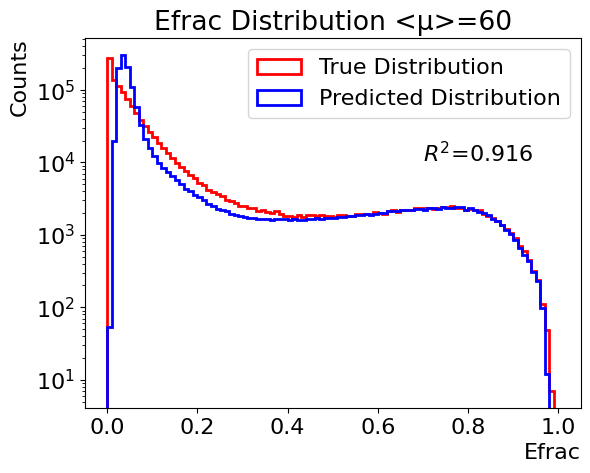

/tmp/ipykernel_159610/1529807277.py:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  hist,xedges,yedges,image = plt.hist2d(np.array(pred_Efrac),np.array(true_Efrac), bins=100,norm=colors.LogNorm())


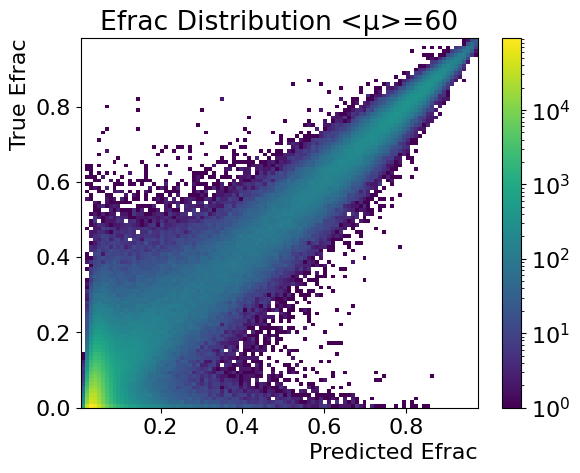

In [8]:
plt.figure()
plt.hist(true_Efrac,histtype='step',color='r',label='True Distribution',bins=100,range=(0,1),linewidth=2)
plt.hist(pred_Efrac,histtype='step',color='b',label='Predicted Distribution',bins=100,range=(0,1),linewidth=2)
plt.title("Efrac Distribution <\u03BC>="+mu)
plt.legend()
plt.yscale('log')
plt.xlabel('Efrac',loc='right')
plt.ylabel('Counts',loc='top')
plt.text(0.7,10e3,r'$R^2$={:3.3f}'.format(r2_score(true_Efrac,pred_Efrac)))
plt.show()

fig, ax = plt.subplots()
plt.title("Efrac Distribution <\u03BC>="+mu)
hist,xedges,yedges,image = plt.hist2d(np.array(pred_Efrac),np.array(true_Efrac), bins=100,norm=colors.LogNorm())
plt.xlabel('Predicted Efrac',loc='right')
plt.ylabel('True Efrac',loc='top')
fig.colorbar(image, ax=ax)
plt.show()

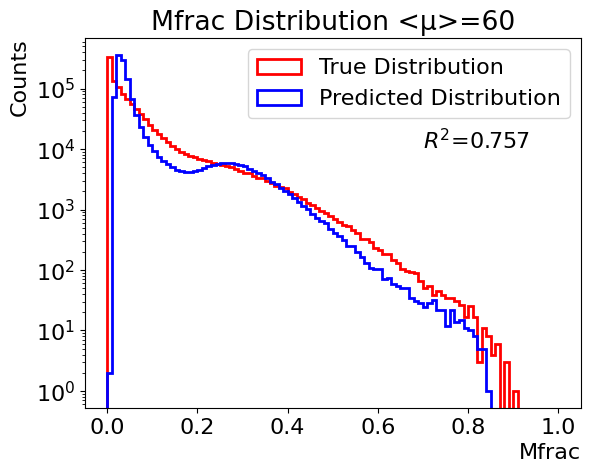

/tmp/ipykernel_159610/7259800.py:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  hist,xedges,yedges,image = plt.hist2d(np.array(pred_Mfrac),np.array(true_Mfrac), bins=100,norm=colors.LogNorm())


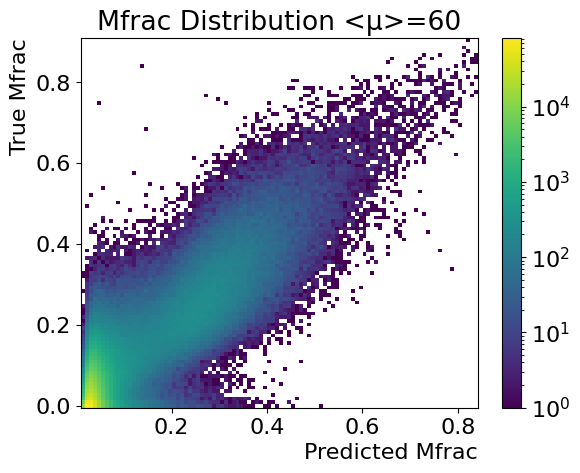

In [9]:
plt.figure()
plt.hist(true_Mfrac,histtype='step',color='r',label='True Distribution',bins=100,range=(0,1),linewidth=2)
plt.hist(pred_Mfrac,histtype='step',color='b',label='Predicted Distribution',bins=100,range=(0,1),linewidth=2)
plt.title("Mfrac Distribution <\u03BC>="+mu)
plt.legend()
plt.yscale('log')
plt.xlabel('Mfrac',loc='right')
plt.ylabel('Counts',loc='top')
plt.text(0.7,10e3,r'$R^2$={:3.3f}'.format(r2_score(true_Mfrac,pred_Mfrac)))
plt.show()

fig, ax = plt.subplots()
plt.title("Mfrac Distribution <\u03BC>="+mu)
hist,xedges,yedges,image = plt.hist2d(np.array(pred_Mfrac),np.array(true_Mfrac), bins=100,norm=colors.LogNorm())
plt.xlabel('Predicted Mfrac',loc='right')
plt.ylabel('True Mfrac',loc='top')
fig.colorbar(image, ax=ax)
plt.show()

/tmp/ipykernel_159610/1979671749.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  binary_true = np.array(true_Efrac>0.3).astype(int)
/tmp/ipykernel_159610/1979671749.py:18: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x1,y1,th1 = roc(binary_true,np.array(pred_Efrac))


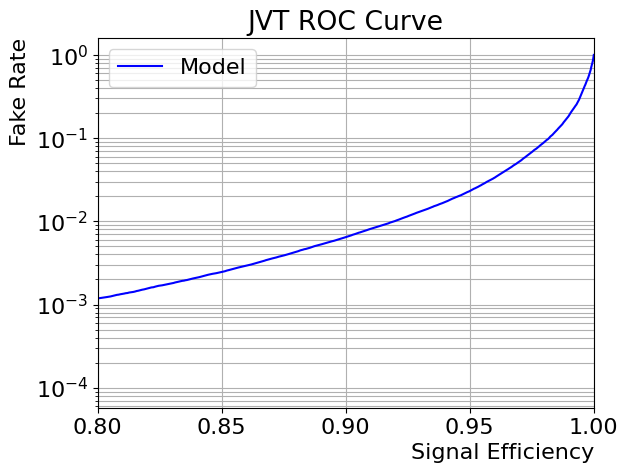

In [10]:
def roc(y_true, y_pred):
    sig = (y_true==1)
    bkg = ~sig
    
    sig_eff = []
    fake_rate = []
    
    thresholds = np.linspace(0,0.6,1000)
    
    for threshold in thresholds:
        sig_eff.append(((y_pred[sig] > threshold).sum() / y_true[sig].shape[0]))
        fake_rate.append(((y_pred[bkg] > threshold).sum()  / y_true[bkg].shape[0]))
        
    return np.array(sig_eff), np.array(fake_rate), thresholds

binary_true = np.array(true_Efrac>0.3).astype(int)

x1,y1,th1 = roc(binary_true,np.array(pred_Efrac))

plt.title("JVT ROC Curve")
plt.plot(x1,y1,color='b',label='Model')

plt.ylabel('Fake Rate',loc='top')
plt.xlabel('Signal Efficiency',loc='right')
plt.yscale('log')
plt.legend(loc='upper left')
plt.xlim([0.8, 1])
plt.grid(which='both')
plt.show()

In [11]:
with open("ROC_Results/MSE_model_mu"+mu+".pkl", "wb") as f:
    pickle.dump([x1,y1],f)